# This page is to document/verify the environment for ML/AI library

Hardware:
    MacOS High Sierra 10.13.6  (16GB DDR3 Intel Gore i7 mid 2014  NVIDIA GeForce GT 750M)
    
    NVIDIA GUP DRIVER https://docs.nvidia.com/cuda/cuda-installation-guide-mac-os-x/index.html 
    
    NVIDIA GPU DRIVER FIX https://www.youtube.com/watch?v=9lKoko8O8F0 

Libraries: 

In [1]:
# NumPy
# http://www.numpy.org 
# https://docs.scipy.org/doc/numpy/reference/
# https://docs.scipy.org/doc/numpy/user/quickstart.html
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

plt.imshow(mandelbrot(400,400))
plt.show()


<Figure size 640x480 with 1 Axes>

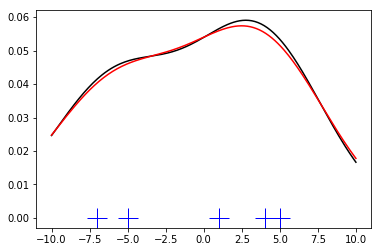

In [2]:
# SciPy
# https://docs.scipy.org/doc/scipy/reference/
# https://docs.scipy.org/doc/scipy/reference/tutorial/index.html
from scipy import stats
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x1 = np.array([-7, -5, 1, 4, 5], dtype=np.float)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
x_eval = np.linspace(-10, 10, num=200)
ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'r-', label="Silverman's Rule")
plt.show()

In [ ]:
# pandas 
# data clean / transform / normalization on top of numpy 
# https://pandas.pydata.org
# http://pandas.pydata.org/pandas-docs/stable/ 
# dataFrame should be the most import object
import numpy as np
import pandas as pd
s = pd.Series([1, 3, 5, np.nan, 6, 8])
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
print(s)
print(dates)
print(df)
print(df2)
df.mean()


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -1.076385  0.766340  0.104597 -0.196307
2013-01-02 -0.958881  1.257573  1.538076 -1.900472
2013-01-03 -0.341073 -0.091703  0.052676 -0.476867
2013-01-04  0.782227  1.320200 -1.058530  1.196420
2013-01-05 -1.709372 -1.214826  1.426749  1.249150
2013-01-06 -0.214806  1.361363 -0.528825 -0.431877
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


A   -0.586382
B    0.566491
C    0.255791
D   -0.093326
dtype: float64

In [ ]:
# tensorflow (google's deep learning )
# https://www.tensorflow.org/install/pip (no GPU support in Mac)
# https://www.tensorflow.org/overview/  
# https://www.tensorflow.org/tutorials/   
# https://www.tensorflow.org/guide/

import tensorflow as tf
print(tf.__version__)
tf.enable_eager_execution()
print(tf.reduce_sum(tf.random_normal([1000, 1000])))

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

1.13.1
tf.Tensor(-344.92053, shape=(), dtype=float32)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3013 - acc: 0.9112
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1482 - acc: 0.9546
Epoch 3/5
 5728/60000 [=>............................] - ETA: 2s - loss: 0.1138 - acc: 0.9644

In [ ]:
# Theano (dead; low level as tnesorflow)
# https://pypi.org/project/Theano/ (maintenance only)
# http://deeplearning.net/software/theano/index.html
# http://deeplearning.net/software/theano/tutorial/index.html
from theano import *
import theano.tensor as T
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)
logistic([[0, 1], [-1, -2]])

s2 = (1 + T.tanh(x / 2)) / 2
logistic2 = theano.function([x], s2)
logistic2([[0, 1], [-1, -2]])

In [ ]:
# keras  (google's wrapper for tensorflow, Theano, & cntk(not available in mac))
# install (CPU & GPU)   https://keras.io/#installation   (most likely has no GPU support)
# https://keras.io/ 
# high level NN API
# https://medium.com/coinmonks/8-things-to-do-differently-in-tensorflows-eager-execution-mode-47cf429aa3ad  

import tensorflow as tf
tf.enable_eager_execution()
from keras.models import Sequential
model = Sequential()
# some complication on placeholder objct...

In [ ]:
# PyPorch (facebook's deep learning for NN and NLP)
# compiled locally to support CUDA https://pytorch.org/get-started/locally/
# https://pytorch.org/tutorials/
# https://pytorch.org/tutorials/beginner/ptcheat.html
# impage processing 
#           https://www.analyticsvidhya.com/blog/2018/02/pytorch-tutorial/
#           https://cs230-stanford.github.io/pytorch-getting-started.html
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)
print(torch.cuda.is_available())
matrix_a = torch.randn(3, 3)
matrix_b = matrix_a.t()
matrix_a + matrix_b

In [ ]:
# scikit-learn (based on NumPy & SciPy and no GPU support)
# https://scikit-learn.org/stable/install.html
# https://scikit-learn.org/stable/index.html
# https://scikit-learn.org/stable/documentation.html
from sklearn import svm
from sklearn import datasets
clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(clf.fit(X, y))  

import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])
print(y[0])

digits = datasets.load_digits()
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])  
clf.predict(digits.data[-1:])

In [ ]:
# no CNTK (microsoft) on mac,
# nltk    ( corpora generate parse tree & stem)
# https://www.nltk.org  (install & install data available in same link)

import nltk
# nltk.download()

from nltk.corpus import brown
print(brown.words())
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
print(tokens)
tagged = nltk.pos_tag(tokens)
print(tagged)
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[1]
t.draw()

In [ ]:
#Caffe & Caffe2  for deep learning 
# excellent on vision project 
# http://caffe.berkeleyvision.org 
# http://caffe.berkeleyvision.org/tutorial/

# https://caffe2.ai 
# https://caffe2.ai/docs/caffe-migration.html (caffe2 is new caffe and competitive with PyTorch)
# https://caffe2.ai/docs/tutorials 

# caffe2 becomes pytorch !! 
# conda install pytorch-nightly-cpu -c pytorch  

In [ ]:
# Matplotlib
# https://matplotlib.org
# visualization tool https://matplotlib.org/tutorials/index.html
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('panther.png')
print(img)
imgplot = plt.imshow(img)
#lum_img = img[:, :, 0]
#plt.imshow(lum_img)

In [ ]:
!pwd
#chatbot agent: cortana/siri/alexa/google  

Support Libraries:

    virtualenv  https://virtualenv.pypa.io/en/stable/installation/
        doc. https://virtualenv.pypa.io/en/stable/userguide/
        
    anaconda  https://www.anaconda.com/distribution/
        doc  https://docs.anaconda.com 
    
    Jupyter 
        doc  https://jupyter.readthedocs.io/en/latest/
        doc  https://jupyter.org/documentation
    
    git  https://git-scm.com/downloads 
        doc  https://git-scm.com/book/en/v2
        doc  http://rogerdudler.github.io/git-guide/
    
    github  https://github.com/yungnien/Springboard 
    
    Docker Desktop  https://hub.docker.com/editions/community/docker-ce-desktop-mac
        doc  https://docs.docker.com/get-started/   
        doc  https://docker-curriculum.com

https://ml-cheatsheet.readthedocs.io/en/latest/index.html
https://python.libhunt.com/categories/312-machine-learning
http://deeplearning.net/software_links/



MXNet (deep learning)
https://mxnet.apache.org/versions/master/index.html
https://mxnet.apache.org/versions/master/install/osx_setup.html
http://mxnet.incubator.apache.org/versions/master/tutorials/index.html
(model zoo)
https://github.com/apache/incubator-mxnet/tree/master/example
Yelp Restaurant Photo Classification


Chainer  (deep learning)
https://chainer.org
https://docs.chainer.org/en/stable/
https://docs.chainer.org/en/stable/install.html




Spark MLlib (not for deep learning, RDD-based; pays-ark is the python version of spark  need Py4j)
https://spark.apache.org/
https://spark.apache.org/downloads.html
https://spark.apache.org/docs/latest/ml-guide.html
https://spark.apache.org/docs/latest/index.html


DL4J  (Keras will serve as the Python API;  this can support the Spark’s short of deep learning model )
https://deeplearning4j.org
https://deeplearning4j.org/tutorials/setup


Lasagne (deep learning)
lightweight library to build and train neural networks in Theano
https://github.com/Lasagne/Lasagne

pylearn2 (also for Theano)
http://deeplearning.net/software/pylearn2/
http://deeplearning.net/software/pylearn2/overview.html

blocks & fuel (also for Theano)
https://github.com/mila-iqia/blocks
https://blocks.readthedocs.io/en/latest/
https://github.com/mila-iqia/fuel

Dlib 
a modern C++ toolkit containing machine learning algorithms and tools 
http://dlib.net
https://github.com/davisking/dlib


PaddlePaddle  (PArallel Distributed Deep LEarning)
http://paddlepaddle.org/en
https://github.com/PaddlePaddle/Paddle
http://paddlepaddle.org/documentation/docs/en/1.3/beginners_guide/index_en.html


TFLearn  (computer of Keras)
a modular and transparent deep learning library built on top of Tensorflow.
http://tflearn.org
http://tflearn.org/installation/
http://tflearn.org/tutorials/
https://github.com/tflearn/tflearn

H2O (a platform for machine learning) 
(a jar package or pip or hadoop) 
https://www.h2o.ai
http://h2o-release.s3.amazonaws.com/h2o/rel-xu/6/index.html
http://h2o-release.s3.amazonaws.com/h2o/rel-xu/6/docs-website/h2o-py/docs/index.html



gensim & fasttext
installation 

for cuDNN 
To install it, copy the *.h files to /usr/local/cuda/include and the lib* files to /usr/local/cuda/lib64.
